**currentMVPS.csv last updated on 2022/01/11**

Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from operator import itemgetter
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

Read currentMVPRace.csv and pastMVPS.csv

In [2]:
currentMVPs = pd.read_csv('Data/currentMVPRace.csv')
pastMVPS = pd.read_csv('Data/pastMVPS.csv')

Split the data into a random train and test set (80% => training data, 20% => testing data)

In [3]:
train, test = train_test_split(pastMVPS, test_size=0.2, random_state=5)

Xtrain = train[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
Ytrain = train[['Share']]
Xtest = test[['G', 'Team Wins', 'Overall Seed', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'FT%', 'WS', 'WS/48', 'VORP', 'BPM']]
Ytest = test[['Share']]

Perform Random Forest Regression to figure out feature importance

In [4]:
RFF = RandomForestRegressor(random_state = 100, criterion = 'mse')

In [5]:
RFF.fit(Xtrain, Ytrain.values.ravel())
prediction = RFF.predict(Xtest)
sorted = RFF.feature_importances_.argsort()

Plot feature importance

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

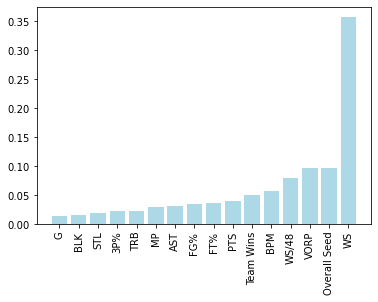

In [6]:
plt.bar(Xtrain.columns[sorted], RFF.feature_importances_[sorted], color='lightblue')
plt.xticks(rotation=90)

**Remove:**
- G => Weakest feature
- MP => Practically not important
- FT% => There have been many MVP winners with terrible FT%
- Team Wins => Overall Seed is a better feature
- BPM => VORP is a better feature
- WS/48 => WS is a better feature

Split the important features into a random train and test set (80% => training data, 20% => testing data)

In [7]:
train, test = train_test_split(pastMVPS, test_size=0.2, random_state=5)

Xtrain = train[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP']]
Ytrain = train[['Share']]
Xtest = test[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP']]
Ytest = test[['Share']]

Select important features from the current MVP race

In [8]:
currentMVPs.head(10)

,Rank,Player,Age,Tm,G,Team Wins,Overall Seed,MP,PTS,TRB,...,FT%,WS,WS/48,VORP,BPM,G-Unadjusted,Wins-Unadjusted,WS-Unadjusted,VORP-Unadjusted,Total-Games
0,1,Giannis Antetokounmpo,27,MIL,64.428571,50.761905,8,32.4,28.5,11.4,...,0.702,12.495238,0.288,6.833333,10.8,33,26,6.4,3.5,42
1,2,Nikola Jokić,26,DEN,71.210526,43.157895,14,32.7,25.8,14.2,...,0.770,13.378947,0.275,9.063158,13.4,33,20,6.2,4.2,38
2,3,Kevin Durant,33,BRK,71.210526,53.947368,6,37.2,29.9,7.6,...,0.888,11.436842,0.207,6.042105,6.9,33,25,5.3,2.8,38
3,4,Rudy Gobert,29,UTA,75.850000,57.400000,4,32.1,15.5,15.1,...,0.683,14.145000,0.277,4.510000,5.3,37,28,6.9,2.2,40
4,5,Stephen Curry,33,GSW,75.692308,63.076923,1,34.8,26.8,5.3,...,0.919,10.512821,0.191,6.097436,7.0,36,30,5.0,2.9,39
5,6,LeBron James,37,LAL,58.000000,42.000000,15,36.8,28.9,7.4,...,0.785,9.800000,0.221,5.800000,8.7,29,21,4.9,2.9,41
6,7,Chris Paul,36,PHO,82.000000,63.076923,2,32.2,14.0,4.4,...,0.832,11.353846,0.206,4.205128,4.4,39,30,5.4,2.0,39
7,8,James Harden,32,BRK,73.368421,53.947368,6,36.9,22.4,8.1,...,0.869,8.631579,0.154,4.100000,4.1,34,25,4.0,1.9,38
8,9,Ja Morant,22,MEM,54.666667,54.666667,5,32.2,24.7,5.8,...,0.768,7.028571,0.184,3.709524,6.3,29,28,3.6,1.9,42
9,10,DeMar DeRozan,32,CHI,57.621622,57.621622,3,35.1,26.4,5.0,...,0.852,9.529730,0.174,2.881081,2.2,34,26,4.3,1.3,37


In [9]:
currentMVPNames = currentMVPs.iloc[:,1]
currentMVPs = currentMVPs[['Overall Seed', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', '3P%', 'WS', 'VORP']]

### KNN

In [10]:
KNN = neighbors.KNeighborsRegressor(
    n_neighbors=9,
    weights='uniform'
)

In [11]:
KNN.fit(Xtrain, Ytrain.values.ravel())

KNeighborsRegressor(n_neighbors=9)

In [12]:
KNNCurrentMVPsPrediction = KNN.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, KNNCurrentMVPsPrediction):
    print(i, j)

Giannis Antetokounmpo 0.2284444444444444
Nikola Jokić 0.10866666666666668
Kevin Durant 0.1797777777777778
Rudy Gobert 0.16722222222222222
Stephen Curry 0.26644444444444443
LeBron James 0.09933333333333334
Chris Paul 0.2048888888888889
James Harden 0.14922222222222226
Ja Morant 0.19322222222222224
DeMar DeRozan 0.1722222222222222


Text(0.5, 0.98, 'KNN Prediction MVP Share')

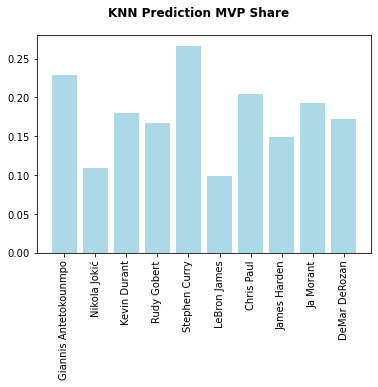

In [13]:
plt.bar(currentMVPNames, KNNCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("KNN Prediction MVP Share", weight = 'bold')

### MLP

In [14]:
MLP = MLPRegressor(
    solver='adam',
    activation='relu',
    learning_rate ='invscaling',
    hidden_layer_sizes=100,
    max_iter=10000,
    random_state=5
)

In [15]:
MLP.fit(Xtrain, Ytrain.values.ravel())

MLPRegressor(hidden_layer_sizes=100, learning_rate='invscaling', max_iter=10000,
             random_state=5)

In [16]:
MLPCurrentMVPsPrediction = MLP.predict(currentMVPs).tolist()

for (i, j) in zip(currentMVPNames, MLPCurrentMVPsPrediction):
    print(i, j)

Giannis Antetokounmpo 0.2289730754477728
Nikola Jokić 0.2384270479978401
Kevin Durant 0.2672531697092797
Rudy Gobert 0.30027510572352134
Stephen Curry 0.6991048524873738
LeBron James 0.1537344696988896
Chris Paul 0.1642892512599442
James Harden 0.12420482861504367
Ja Morant -0.0006009201434904465
DeMar DeRozan 0.17854682578753178


Text(0.5, 0.98, 'MLP Prediction MVP Share')

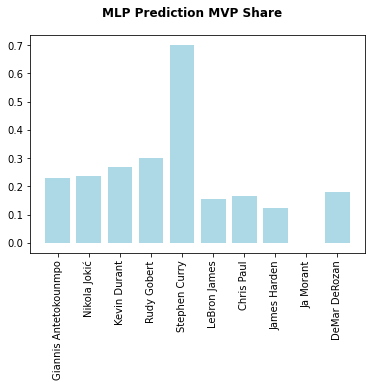

In [17]:
plt.bar(currentMVPNames, MLPCurrentMVPsPrediction, color='lightblue')
plt.xticks(rotation=90)
plt.suptitle("MLP Prediction MVP Share", weight = 'bold')